<a id='sec_Notebooks_Vectores_y_Bloch'></a>
# Vectores de estado y la esfera de Bloch

In [ ]:
# No olvidar que en "Google colab" hay que instalar qiskit

########################
# Instala versión 0.45.2
########################
# Importante, poner qiskit-aer en la misma linea de "pip install" para que coja la versión adecuada
try:
    import google.colab
    print("In colab, let's install things...")
    #
    !pip install qiskit[visualization]==0.45.2 qiskit-aer qiskit-ibm-runtime ipywidgets
except ImportError:
    print("NOT in colab")

## Índice

- **[1 - La clase Statevactor de Qiskit](#sec_Notebooks_Vectores_y_Bloch_1)**
- **[2 - Normalización del vector](#sec_Notebooks_Vectores_y_Bloch_2)**
- **[3 - Estado a partir de los ángulos](#sec_Notebooks_Vectores_y_Bloch_3)**

In [1]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex  

Para visualizar vectores en la esfera de Bloch tenemos varias opciones. Una de ellas es un [visualizador online en Java:](https://javafxpert.github.io/grok-bloch/?fbclid=IwAR1lWfCug1lfTXxXenaJxnsdJh2g3he6lBJmjnjL_Jus0gOHR9u3UuaT7qs).

Aquí vamos a centrarnos en la clase <a href=https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html>statevector</a> de *qiskit* que cuenta con un *visualizador* de la esfera de Bloch. La clase  acepta una lista de dos números complejos como componentes de un vector.  


<a id='sec_Notebooks_Vectores_y_Bloch_1'></a>
## La clase Statevactor de Qiskit 

In [2]:
# Ejemplo de vector de estado |+> 
state_plus =[1/np.sqrt(2),1/np.sqrt(2)]

statevector_plus = Statevector(state_plus)

In [3]:
statevector_plus.draw('latex')

<IPython.core.display.Latex object>

In [4]:
statevector_plus.draw('latex_source')

'\\frac{\\sqrt{2}}{2} |0\\rangle+\\frac{\\sqrt{2}}{2} |1\\rangle'

In [5]:
# Para escribirlo en terminal sin ser en un Jupiter
print(statevector_plus.draw('text'))  

[0.70710678+0.j,0.70710678+0.j]


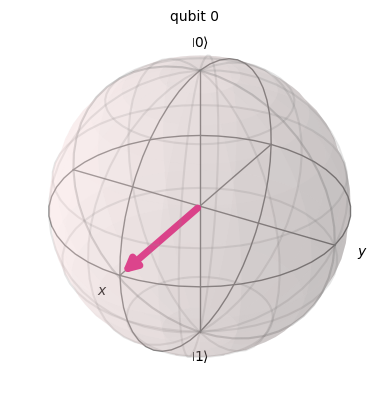

In [6]:
statevector_plus.draw('Bloch')

El método `statevector_plus.draw('Bloch')` nos devuelve una figura de Matplotlib, así que podemos usar métodos como `savefig()`

In [7]:
statevector_plus.draw('Bloch').savefig("Figuras_Chapter_01-Estados_y_Esfera_de_Bloch/Fig_Bloch_plus_state")

<a id='sec_Notebooks_Vectores_y_Bloch_2'></a>
## Normalización del vector

Esta rutina no verifica si el vector está normalizado, como podemos ver en el siguiente ejemplo.

In [8]:
state_2 =[5/np.sqrt(2),1/np.sqrt(2)]

statevector_2 = Statevector(state_2)
statevector_2.draw('latex')

<IPython.core.display.Latex object>

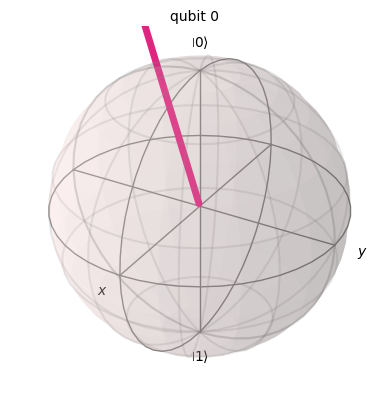

In [9]:
statevector_2.draw('bloch')

<a id='sec_Notebooks_Vectores_y_Bloch_3'></a>
## Estado a partir de los ángulos 

Una forma de construir un estado normalizado es usando la parametrización 

$$
|u\rangle = \cos{\frac{\theta}{2}}\, |0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}\,|1\rangle 
$$

Hagamos una función que nos de el estado a partir de los ángulos $\theta$ y $\phi$

In [10]:
def state_from_angles(theta, phi):
    u0 = np.cos(theta/2)
    u1 = (np.exp(1j*phi))*np.sin(theta/2)

    uket = [u0,u1]
    return Statevector(uket)

statevector_y_plus = state_from_angles(np.pi/2, np.pi/2)
statevector_y_plus.draw('Latex')

<IPython.core.display.Latex object>

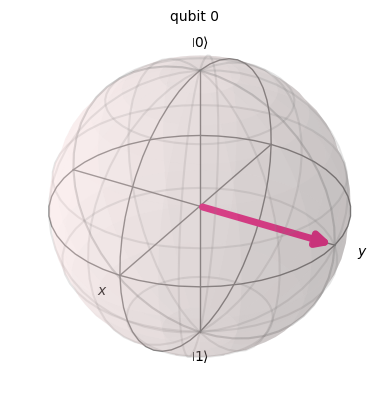

In [11]:
statevector_y_plus.draw('Bloch')

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table